# Работа с датасетом CIFAR-10

In [1]:
#Импортируем необходимые библиотеки для работы
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

import time
from sklearn import metrics

from cf_matrix import make_confusion_matrix

In [2]:
#Получаем матрицы с датасета cifar10
(X_trainRGB, y_train), (X_testRGB, y_test) = datasets.cifar10.load_data()

## Предварительный анализ данных

Смотрим распределение данных по классам тестовой выборки

In [3]:
test_class_arr = y_test.reshape(-1)
test_class_arr

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [4]:
test_index_arr = np.array(range(1,test_class_arr.shape[0]))
test_index_arr

array([   1,    2,    3, ..., 9997, 9998, 9999])

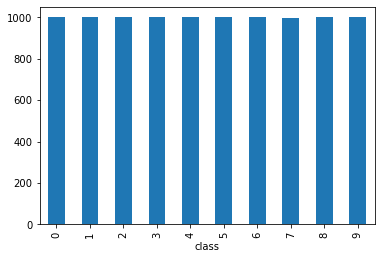

In [5]:
df_test = pd.DataFrame(list(zip(test_index_arr, test_class_arr)), columns =['index', 'class'])
df_test.groupby("class")["index"].count().plot(kind="bar")
plt.savefig('./img/test.png', bbox_inches='tight')

In [6]:
df_test.shape

(9999, 2)

Смотрим распределение данных по классам тренировочной выборки

In [7]:
train_class_arr = y_train.reshape(-1)
train_class_arr

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
train_index_arr = np.array(range(1,train_class_arr.shape[0]))
train_index_arr

array([    1,     2,     3, ..., 49997, 49998, 49999])

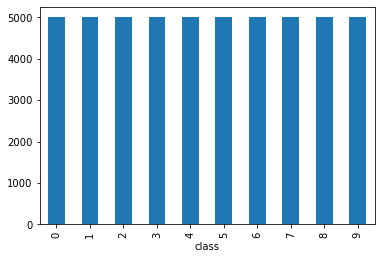

In [9]:
df_train = pd.DataFrame(list(zip(train_index_arr, train_class_arr)), columns =['index', 'class'])
df_train.groupby("class")["index"].count().plot(kind="bar")
plt.savefig('./img/train.png', bbox_inches='tight')

In [10]:
df_train.shape

(49999, 2)

Классы максимально возможно сбалансированы между собой

## Препроцессинг данных

In [11]:
X_trainRGB

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### Переводим классы из двухмерного в одномерный массив

Для тренировочных данных классов

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train = y_train.reshape(-1,)

In [15]:
y_train.shape

(50000,)

Для тестовых данных классов

In [16]:
y_test.shape

(10000, 1)

In [17]:
y_test = y_test.reshape(-1,)

In [18]:
y_test.shape

(10000,)

#### Переводим изображения в черно-белые для последующей передачи в sklearn

In [19]:
def show_image(img):
    plt.figure(figsize = (32,2))
    plt.imshow(img)

Работаем с x_train

In [20]:
X_trainRGB.shape

(50000, 32, 32, 3)

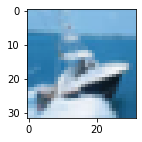

In [21]:
show_image(X_trainRGB[8])

In [22]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_trainRGB])

In [23]:
X_train.shape

(50000, 32, 32)

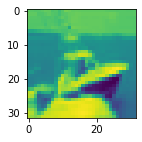

In [24]:
show_image(X_train[8])

In [25]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [26]:
X_train.shape

(50000, 1024)

Работаем с X_test

In [27]:
X_testRGB.shape

(10000, 32, 32, 3)

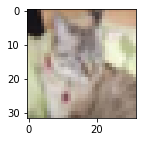

In [28]:
show_image(X_testRGB[8])

In [29]:
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_testRGB])

In [30]:
X_test.shape

(10000, 32, 32)

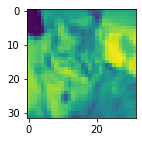

In [31]:
show_image(X_test[8])

In [32]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [33]:
X_test.shape

(10000, 1024)

#### Нормализация изображений

Для чёрно-белых изображений

In [34]:
X_train[1]

array([177, 135, 101, ..., 136, 137, 137], dtype=uint8)

In [35]:
X_train  = X_train/255
X_test  = X_test/255

In [36]:
X_train[1]

array([0.69411765, 0.52941176, 0.39607843, ..., 0.53333333, 0.5372549 ,
       0.5372549 ])

Для RGB

In [37]:
X_trainRGB[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [38]:
X_trainRGB  = X_trainRGB/255
X_testRGB  = X_testRGB/255

In [39]:
X_trainRGB[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

## Работа в sklearn

Реализация "классических" алогритмов с помощью библиотеки sklearn.<br>Обработка матриц проходит только на CPU, так что надо ОЧЕНЬ долго пождождать

In [40]:
# Реализация метода опорных векторов через SVC
from sklearn import svm

start_time = time.time()
nb = svm.SVC().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49      1000
           1       0.55      0.54      0.55      1000
           2       0.35      0.32      0.33      1000
           3       0.33      0.28      0.30      1000
           4       0.36      0.44      0.40      1000
           5       0.47      0.37      0.42      1000
           6       0.44      0.55      0.49      1000
           7       0.55      0.47      0.51      1000
           8       0.53      0.60      0.56      1000
           9       0.51      0.56      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000

Время выполнения 1986.0369980335236


In [41]:
#Реализация наивного байесовского метода
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
nb = MultinomialNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.18      0.11      0.13      1000
           1       0.30      0.15      0.20      1000
           2       0.33      0.15      0.21      1000
           3       0.20      0.06      0.10      1000
           4       0.20      0.17      0.18      1000
           5       0.19      0.44      0.27      1000
           6       0.20      0.08      0.12      1000
           7       0.18      0.23      0.21      1000
           8       0.25      0.40      0.31      1000
           9       0.30      0.51      0.37      1000

    accuracy                           0.23     10000
   macro avg       0.23      0.23      0.21     10000
weighted avg       0.23      0.23      0.21     10000

Время выполнения 0.5103480815887451


In [42]:
# Реализация метода k-ближайших соседей
import sklearn.neighbors as neigh

start_time = time.time()
kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
y_pred = kn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36      1000
           1       0.84      0.07      0.13      1000
           2       0.23      0.35      0.28      1000
           3       0.33      0.06      0.10      1000
           4       0.18      0.59      0.27      1000
           5       0.58      0.13      0.21      1000
           6       0.27      0.24      0.25      1000
           7       0.65      0.14      0.23      1000
           8       0.29      0.67      0.40      1000
           9       0.65      0.14      0.23      1000

    accuracy                           0.28     10000
   macro avg       0.44      0.28      0.25     10000
weighted avg       0.44      0.28      0.25     10000

Время выполнения 16.50240683555603


In [43]:
# Реализация метода опорных векторов через LinearSVC
import sklearn.svm as svm
start_time = time.time()
svect = svm.LinearSVC(max_iter=5000).fit(X_train, y_train)
y_pred = svect.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.33      0.37      0.35      1000
           1       0.30      0.35      0.32      1000
           2       0.22      0.14      0.17      1000
           3       0.21      0.12      0.15      1000
           4       0.23      0.16      0.19      1000
           5       0.27      0.28      0.27      1000
           6       0.23      0.25      0.24      1000
           7       0.28      0.26      0.27      1000
           8       0.31      0.39      0.35      1000
           9       0.31      0.47      0.37      1000

    accuracy                           0.28     10000
   macro avg       0.27      0.28      0.27     10000
weighted avg       0.27      0.28      0.27     10000

Время выполнения 4111.561882972717


/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
# Реализация логистической регресси
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logr = LogisticRegression(max_iter=5000, n_jobs=6).fit(X_train, y_train)
y_pred = logr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.34      0.36      0.35      1000
           1       0.33      0.35      0.34      1000
           2       0.23      0.20      0.21      1000
           3       0.20      0.16      0.18      1000
           4       0.21      0.19      0.20      1000
           5       0.27      0.27      0.27      1000
           6       0.25      0.28      0.27      1000
           7       0.28      0.28      0.28      1000
           8       0.34      0.38      0.36      1000
           9       0.36      0.41      0.39      1000

    accuracy                           0.29     10000
   macro avg       0.28      0.29      0.28     10000
weighted avg       0.28      0.29      0.28     10000

Время выполнения 557.3704369068146


In [40]:
# Реализация метода случайного леса RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

start_time = time.time()
max_depth = [1,5,10,50]
n_estimators = [5,10,100,500]
grid_params ={'max_depth':max_depth,'n_estimators':n_estimators}
rf = GridSearchCV(RandomForestClassifier(class_weight = 'balanced'), grid_params, scoring = 'accuracy', cv=10,n_jobs=6, return_train_score=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50      1000
           1       0.50      0.50      0.50      1000
           2       0.40      0.34      0.37      1000
           3       0.35      0.25      0.29      1000
           4       0.38      0.39      0.39      1000
           5       0.42      0.37      0.40      1000
           6       0.43      0.53      0.47      1000
           7       0.47      0.45      0.46      1000
           8       0.50      0.57      0.53      1000
           9       0.45      0.55      0.49      1000

    accuracy                           0.44     10000
   macro avg       0.44      0.44      0.44     10000
weighted avg       0.44      0.44      0.44     10000

Время выполнения 6296.492598056793


In [43]:
# Реализация линейного классификатора с SGD-обучением 
import math
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

start_time = time.time()
alpha = [10**x for x in range(-4,4)]
penalty = ["l1","l2"]
grid_params ={'alpha':alpha,'penalty':penalty}
alpha_log = [math.log(x,10) for x in grid_params["alpha"]]
sgd = GridSearchCV(SGDClassifier(class_weight= 'balanced'), grid_params, scoring = 'accuracy', cv=10,n_jobs=6, return_train_score=True)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.33      0.38      0.35      1000
           1       0.36      0.28      0.32      1000
           2       0.00      0.00      0.00      1000
           3       0.29      0.01      0.02      1000
           4       0.17      0.38      0.23      1000
           5       0.46      0.05      0.09      1000
           6       0.19      0.43      0.27      1000
           7       0.46      0.09      0.15      1000
           8       0.52      0.03      0.05      1000
           9       0.22      0.71      0.34      1000

    accuracy                           0.24     10000
   macro avg       0.30      0.24      0.18     10000
weighted avg       0.30      0.24      0.18     10000

Время выполнения 1004.7452211380005


/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## Реализация в keras

Реализация классификатора с использованием алгоритмов глубокого обучения ANN и CNN

In [40]:
from keras.utils.vis_utils import plot_model
import visualkeras
import pandas as pd
import numpy as np

#### Строим простую ANN (artificial neural network)

In [41]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

Metal device set to: Apple M1


2022-04-21 22:09:48.829162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-21 22:09:48.829397: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


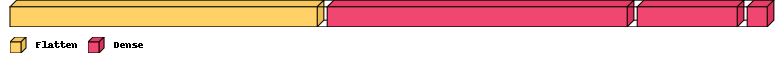

In [42]:
visualkeras.layered_view(ann, legend=True, to_file='./img/ann.png')

In [43]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [44]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
start_time = time.time()
ann.fit(X_trainRGB, y_train, epochs=150)
print("Время выполнения", (time.time()-start_time))

Epoch 1/150


2022-04-21 22:09:50.696515: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-21 22:09:50.868243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 12ms/step - loss: 1.8126 - accuracy: 0.3525
Epoch 2/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6237 - accuracy: 0.4247
Epoch 3/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5411 - accuracy: 0.4560
Epoch 4/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4820 - accuracy: 0.4780
Epoch 5/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4323 - accuracy: 0.4950
Epoch 6/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3906 - accuracy: 0.5103
Epoch 7/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3520 - accuracy: 0.5253
Epoch 8/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3149 - accuracy: 0.5385
Epoch 9/150
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2821 - accuracy: 0.5509
Epoch 10/150
1563/1563 [==============================] - 17s 11ms/

In [46]:
y_pred = ann.predict(X_testRGB)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

2022-04-21 22:53:00.818830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1000
           1       0.71      0.67      0.69      1000
           2       0.48      0.47      0.48      1000
           3       0.41      0.40      0.40      1000
           4       0.53      0.52      0.52      1000
           5       0.50      0.50      0.50      1000
           6       0.65      0.65      0.65      1000
           7       0.62      0.64      0.63      1000
           8       0.70      0.70      0.70      1000
           9       0.61      0.63      0.62      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



Как видим из отчета, точность классификации составляет 60%, что хорошо

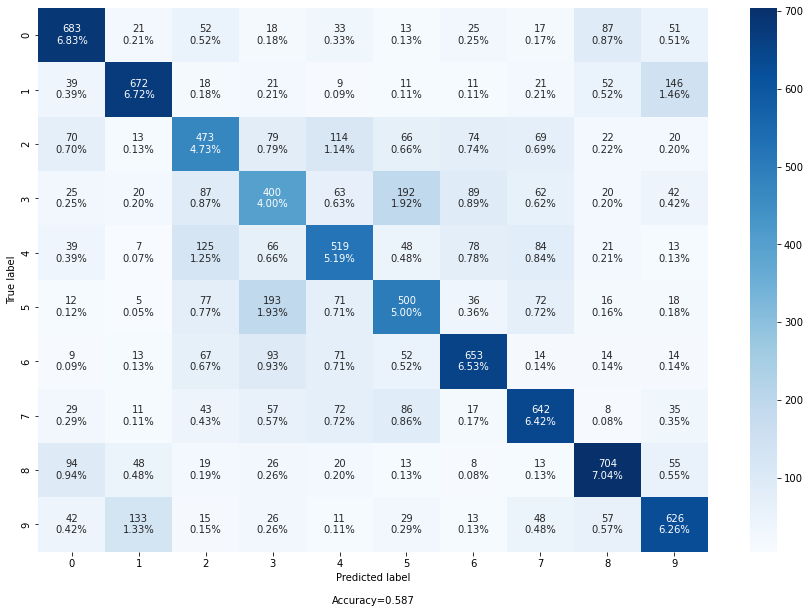

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred_classes)
make_confusion_matrix(cf_matrix, figsize=(15,10), cbar=True)
plt.savefig("./img/ann_matrix.png",bbox_inches='tight')

#### Строим cвёрточную нейронную сеть (CNN)

In [48]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

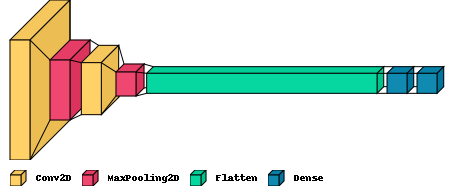

In [49]:
visualkeras.layered_view(cnn, legend=True, to_file='./img/cnn.png')

In [50]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [51]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
start_time = time.time()
cnn.fit(X_trainRGB, y_train, epochs=12)
print("Время выполнения", (time.time()-start_time))

Epoch 1/12
   5/1563 [..............................] - ETA: 26s - loss: 2.3012 - accuracy: 0.1063 

2022-04-21 22:53:05.294035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 17s 10ms/step - loss: 1.4575 - accuracy: 0.4785
Epoch 2/12
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1070 - accuracy: 0.6123
Epoch 3/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9819 - accuracy: 0.6572
Epoch 4/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9037 - accuracy: 0.6868
Epoch 5/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8421 - accuracy: 0.7077
Epoch 6/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7884 - accuracy: 0.7252
Epoch 7/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7429 - accuracy: 0.7413
Epoch 8/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7009 - accuracy: 0.7549
Epoch 9/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6618 - accuracy: 0.7692
Epoch 10/12
1563/1563 [==============================] - 16s 10ms/step - lo

In [53]:
y_pred = cnn.predict(X_testRGB)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

2022-04-21 22:56:18.065352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1000
           1       0.86      0.76      0.81      1000
           2       0.58      0.60      0.59      1000
           3       0.52      0.48      0.50      1000
           4       0.65      0.62      0.64      1000
           5       0.54      0.69      0.61      1000
           6       0.82      0.72      0.77      1000
           7       0.74      0.76      0.75      1000
           8       0.85      0.77      0.81      1000
           9       0.70      0.85      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



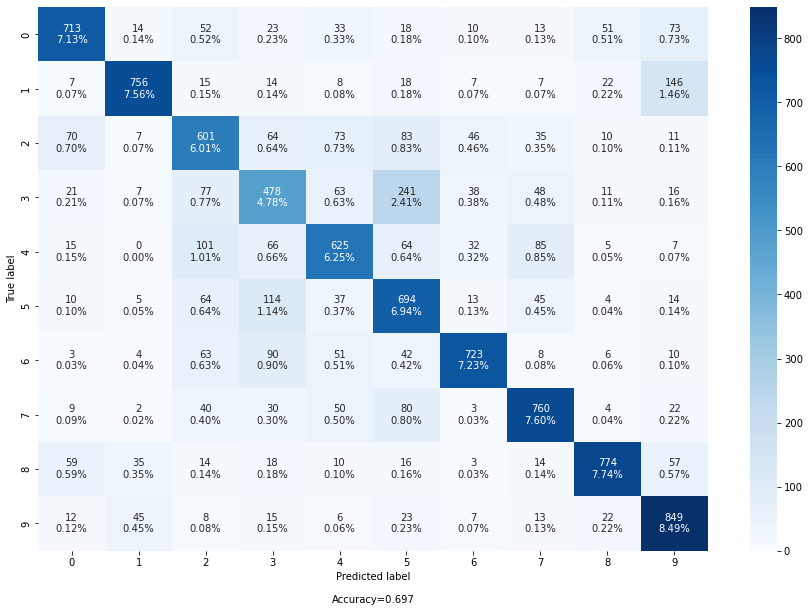

In [54]:
cf_matrix = confusion_matrix(y_test, y_pred_classes)
make_confusion_matrix(cf_matrix, figsize=(15,10), cbar=True)
plt.savefig("./img/cnn_matrix.png",bbox_inches='tight')

## Смотрим на результаты

In [55]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [56]:
def plot_sample(x_images, y_test, y_model_pred, index):
    

    plt.figure(figsize = (32,2))
    plt.imshow(x_images[index])

    plt.title(classes[y_test[index]],fontsize=14)
    plt.xlabel(f"Модель думает это {classes[y_model_pred[index]]}",fontsize=14)

In [57]:
y_test.shape

(10000,)

In [58]:
y_pred_classes = np.array(y_pred_classes)
y_pred_classes.shape

(10000,)

Индексы тех изображений, которые определились неправильно

In [59]:
false_detection_indexes = np.where(y_pred_classes-y_test != 0)[0]
false_detection_indexes.shape

(3027,)

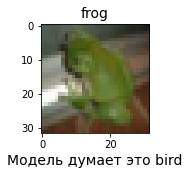

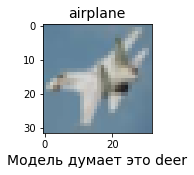

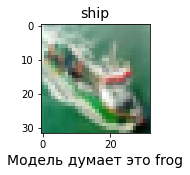

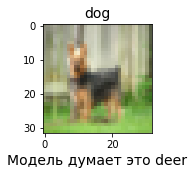

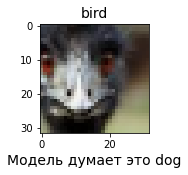

In [60]:
for index in false_detection_indexes[:5]:
    plot_sample(X_testRGB, y_test, y_pred_classes, index)

In [61]:
true_detection_indexes = np.where(y_pred_classes-y_test == 0)[0]
true_detection_indexes.shape

(6973,)

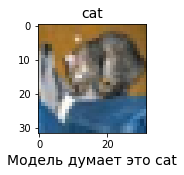

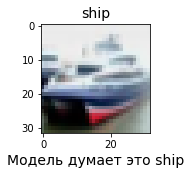

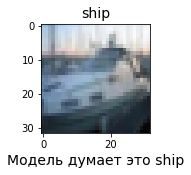

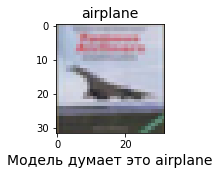

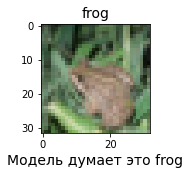

In [62]:
for index in true_detection_indexes[:5]:
    plot_sample(X_testRGB, y_test, y_pred_classes, index)